## IT44: Analyse numérique et splines

### I. Polynôme d'interpolation

#### a) Polynômes de Lagrange

Les polynômes de Lagrange sont des polynômes de la forme $ l_i(x) = \prod_{j \ne i, j=0}^n \frac{(x-x_j)}{(x_i-x_j)} $ ils permettent de générer simplement le polynôme d'interpolation d'une fonction $ f $ en fonction des points d'interpolations fournis, cependant il est fastidieux de les calculer par ordinateur contrairement aux polynômes de Newton.

#### b) Polynômes de Newton

##### Les différences divisées

Elles sont indispensable à la bonne génération du polynôme, on peut les obtenir par code de la manière suivante:

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def diff_div_tab(n, x, y): #Fonction permettant le calcul de la table des différences divisées
    tab = []
    for i in range(n):
        tab.insert(i, [])
        tab[i].insert(0, y[i])

    for j in range(1, n):
        for i in range(0, n-j):
            tab[i].insert(j,(tab[i+1][j-1]-tab[i][j-1])/(x[i+j]-x[i]))

    return tab

def printTab(tab):
    for i in tab:
        print(i)

x = [1,2,3,4]
y = []
for xi in reversed(x):
    y.insert(0, np.sin(xi))
n = len(x)

tab = diff_div_tab(n,x,y)
printTab(tab)

[0.8414709848078965, 0.0678264420177852, -0.41800193039179984, 0.11770979603026978]
[0.9092974268256817, -0.7681774187658145, -0.06487254230099049]
[0.1411200080598672, -0.8979225033677954]
[-0.7568024953079282]


Nous pouvons observer par exemple ci-dessus la table des différences divisées de la fonction sinus avec les points d'absisses 1, 2, 3 et 4.

##### Le polynôme

A partir de ces différences divisées nous pouvons calculer le polynôme en un point de la manière suivante:

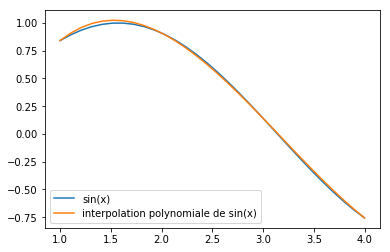

In [64]:
def eval_poly(x, n, liste_x, diff_div):
    eval = 0
    for i in range(n):
        z = 1
        for j in range(i):
            z = z * (x - liste_x[j])
        eval += diff_div[i]*z
    return eval

xi = np.linspace(1,4,30)
yi = np.sin(xi)
plt.plot(xi,yi)
for i in range(30):
    yi[i] = eval_poly(xi[i],n,x,tab[0])
plt.plot(xi, yi)
plt.legend(["sin(x)","interpolation polynomiale de sin(x)"])

plt.show()

Comme nous pouvons voir sur la figure ci-dessus représentant la fonction $ f : x \mapsto \sin{x} $ ainsi que son polynôme d'interpolation sur le support $ \{1,2,3,4\} $ nous obtenons une très bonne approximation de la fonction $ f $ sur $ [1;4] $ cependant comme nous pouvons le constater ci-dessous en dehors du support le polynôme n'approxime que très mal la fonction.

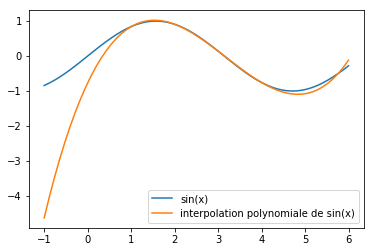

In [65]:
plt.clf()

xi = np.linspace(-1,6,60)
yi = np.sin(xi)
plt.plot(xi,yi)
for i in range(60):
    yi[i] = eval_poly(xi[i],n,x,tab[0])
plt.plot(xi, yi)
plt.legend(["sin(x)","interpolation polynomiale de sin(x)"])

plt.show()

### II. Les courbes de Bézier

Les courbes de Bézier sont une manière d'obtenir une courbe à l'aide de différents points de contrôles et de changer sa forme en fonction de ces dit points de contrôles et celà permet beaucoup de choses non permises par les polynômes d'interpolation, notamment de "rebrousser chemin" sur l'axe des x ce qui est impossible en utilisant des polynômes d'interpolation car il s'agit de fonctions ne pouvant avoir qu'une seule valeur en une absisse donnée.

#### L'algorithme de Casteljau

Cet algorithme permet d'évaluer une courbe de Bézier en fonction du paramètre $ t $ il s'exprime de la manière suivante:

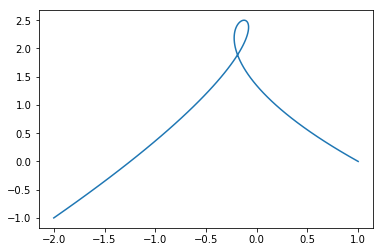

In [58]:
def Casteljau(liste_point, n, t):
    if(n==1):
        return liste_point[0]
    nouvelle_liste = []
    for i in range(n-1):
        nouvelle_liste.insert(i,[(1-t)*liste_point[i][0] + t*liste_point[i+1][0], (1-t)*liste_point[i][1] + t*liste_point[i+1][1]])
    return Casteljau(nouvelle_liste, n-1, t)

points = [[1,0],[-2,3],[2,4],[-2,-1]]

t = np.linspace(0,1,100)
x = []
y = []
for i in range(100):
    newPoint = Casteljau(points, len(points),t[i])
    x.insert(i,newPoint[0])
    y.insert(i,newPoint[1])

plt.clf()
plt.plot(x,y)

plt.show()

Nous pouvons observer ci-dessus la courbe de Bézier définie à l'aide des points de contrôles $ \{ \left( \begin{array}{c} 1 \\ 0 \\ \end{array} \right) , \left( \begin{array}{c} -2 \\ 3 \\ \end{array} \right) , \left( \begin{array}{c} 2 \\ 4 \\ \end{array} \right) , \left( \begin{array}{c} -2 \\ -1 \\ \end{array} \right) \} $ (choisis arbitrairements afin de générer un point double) et générés à l'aide de la fonction `Casteljau` qui permet d'évaluer de manière récursive la courbe de Bézier en fonction de t et des points de contrôle.

### III. Les B-Splines

Les B-Splines permettent un degré de liberté supplémentaire par rapport aux courbes de Béziers car on peut avec celles-ci influencer sur les poids des différents points afin de permettre que la courbe soit plus ou moins proche de certains points de contrôles. L'algorithme d'évaluation de la courbe en un point est l'algorithme de Boor-Cox qui est très semblable à celui de Casteljau sauf en ajoutant les poids des différents points.


### IV. Intégration numérique

#### a) Différentes méthodes

Voyons ensemble comment nous pouvons intégrer une fonction à l'aide de différentes méthodes. Voyons d'abords les méthodes des rectangles, du point milieu et de Simpson, qui se traduisent algorithmiquement de la manière suivante :

Méthode des rectangles
Integrale = 0.958093614156


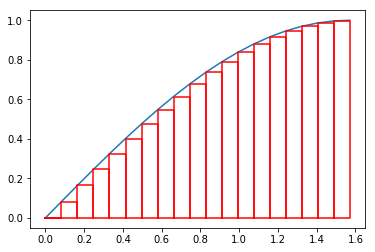

In [97]:
plt.clf()
xmin = 0
xmax = np.pi/2
nb_intervalles = 20 # nombre d'intervalles

x = np.linspace(xmin, xmax, nb_intervalles)
y = np.sin(x)
plt.plot(x,y)

value_r = 0
for i in range(nb_intervalles-1):
    value_r += y[i]*(x[i+1]-x[i])
    # dessin du rectangle
    x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
    y_rect = [0, y[i], y[i], 0, 0] # ordonnees des sommets
    plt.plot(x_rect, y_rect, "r")
print("Méthode des rectangles\nIntegrale = {}".format(value_r))

plt.show()

Méthode des trapèzes
Integrale = 0.999430359598


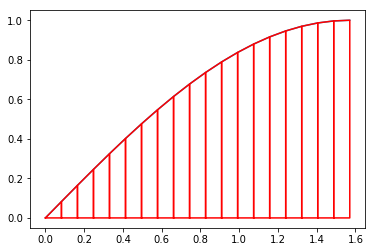

In [92]:
plt.clf()
plt.plot(x,y)
value_t = 0
for i in range(nb_intervalles-1):
    value_t += (y[i]+y[i+1])*(x[i+1]-x[i])/2
    # dessin du trapèze
    x_trap = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
    y_trap = [0, y[i], y[i+1], 0, 0] # ordonnees des sommets
    plt.plot(x_trap, y_trap, "r")
print("Méthode des trapèzes\nIntegrale = {}".format(value_t))

plt.show()

In [96]:
value_s = 0
for i in range(nb_intervalles-1):
            value_s += (x[i+1]-x[i])/6*(y[i] + 4 * np.sin((x[i] + x[i+1])/2) + y[i+1])
print("Méthode de Simpson\nIntegrale = {}".format(value_s))

Méthode de Simpson
Integrale = 1.00000001622


Ci-dessus nous avons les trois principales méthodes d'intégrations algorithmiques avec en premier lieu la méthode des rectangles qui peut être dérivées afin d'obtenir la méthode dîte du point milieu, et qui consiste à approximer l'aire sous la courbe à l'aide de plusieurs rectangles juxtaposés dont l'aire est plus simple à calculer, et dont on peut améliorer la précision en augmentant le nombre de rectangles. Ensuite nous avons la méthode des trapèzes qui à la place d'approximer les courbe par une suite de rectangles juxtaposés, approxime la courbe par une suite de trapèzes juxtaposés, afin de mieux épouser la courbe et d'obtenir une meilleure approximation. Finalement nous pouvons citer la méthode de Simpson qui s'obtient en faisant $ \frac{4M+2T}{6} $ avec $ M $ l'aire obtenue à l'aide de la méthode des milieux et $ T $ l'aire obtenue à l'aide de la méthode des trapèzes, ou nous pouvons l'obtenir à l'aide de l'algorithme ci-dessus. La méthode de Simpson est bien plus précise que les deux méthodes précédentes comme l'utiliser revient à utiliser une suite de polynômes de degré 2 pour approximer la fonction.

#### Les méthodes gaussiennes

Les méthodes gaussiennes reposent sur l'interpolation polynomiale et nous permet une approximation encore plus précise de la fonction grace à un produit scalaire associé à l'espace des polynômes et les différents poids calculés à l'aide des polynômes de Lagrange par exemple dans le cas de la formule de Gauss-Legendre. L'erreur d'intégration dépend quant à elle du nombre de points d'interpolation et donc est de plus en plus minime plus le nombre de point est élevé.

### Conclusion

Au cours d'IT44, nous avons vu comment nous pouvions approximer une courbe ou une forme en ne connaissant que certains points de celles-ci, mais aussi comment cette approximation pouvait nous permettre d'approximer l'aire sous une fonction. 